### Model usage:
It establishes a linear relationship between independent features (such as median income) and the target variable. Linear Regression is computationally efficient, easy to interpret via coefficients, and provides a clear baseline for performance using metrics like $R^2$ and Mean Squared Error.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [15]:
data = fetch_california_housing() 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015

<Axes: >

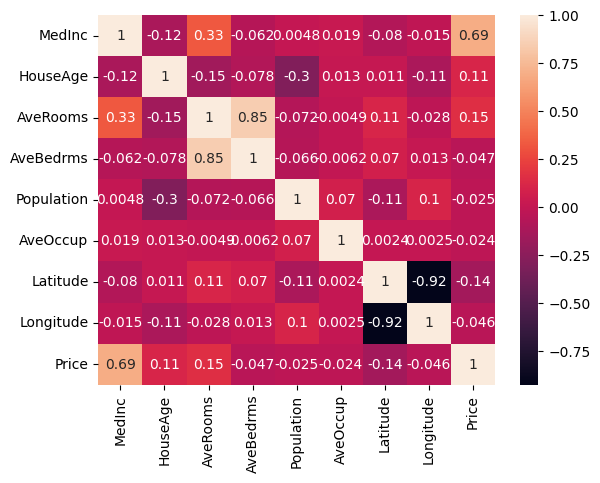

In [16]:
print(df.isnull().sum()) 
print(df.corr()) 
sns.heatmap(df.corr(), annot=True)

In [17]:
df_filtered = df[df['MedInc'] > df['MedInc'].mean()]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered.drop('Price', axis=1), df_filtered['Price'], test_size=0.2, random_state=42) 
model = LinearRegression().fit(X_train, y_train)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}") 


MAE: 0.6077214747157336


In [21]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 0.6176663092483315


In [22]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.5385170350551147


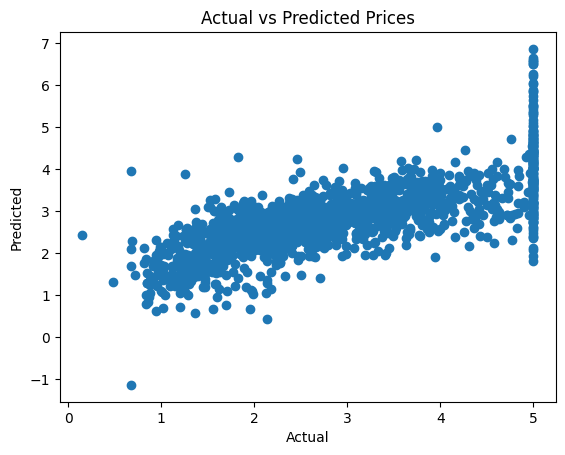

In [23]:
plt.scatter(y_test, y_pred); plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted Prices'); 
plt.show()